In [48]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
 
%matplotlib inline

In [49]:
df = pd.read_csv("linkedin_company.csv", na_values=[''])
print(df.shape)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2426196, 14)


,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [50]:
# %age of missing values for each column
#print(100*df.isnull().sum()/df.shape[0])
#df.dtypes
#df.describe()

In [51]:
df['as_of_date'] = pd.to_datetime(df['as_of_date'], format='%Y-%m-%d')
df = df.sort_values(by='as_of_date')
df = df.drop(['entity_id', 'cusip', 'isin'], axis=1)
df.shape

(2426196, 11)

In [52]:
df['industry'] = df['industry'].str.strip()
df['company_name'] = df['company_name'].str.strip()

df_industry_date = df.groupby(['industry', 'as_of_date'])[['employees_on_platform','followers_count']].sum().reset_index()
print(df_industry_date.shape)

df_industry = df.groupby(['industry'])[['employees_on_platform']].count().reset_index()
print(df_industry.shape)

df_industry_company = df.groupby(['industry', 'company_name'])[['employees_on_platform']].count().reset_index()
print(df_industry_company.shape)


(99426, 4)
(140, 2)
(5526, 3)


In [53]:
df_industry_date.head()

,industry,as_of_date,employees_on_platform,followers_count
0,Accounting,2016-04-21,6075,13242
1,Accounting,2016-04-22,5848,13244
2,Accounting,2016-04-23,5852,13246
3,Accounting,2016-04-24,5855,13249
4,Accounting,2016-04-25,5863,13251


In [54]:
df_accounting = df_industry_date[(df_industry_date['industry'] == 'Accounting')]
print("Industry: Accounting  {}".format(df_accounting.shape))
df_invbanking = df_industry_date[(df_industry_date['industry'] == 'Investment Banking')]
print("Industry: Investement Banking  {}".format(df_invbanking.shape))
df_oilenergy = df_industry_date[(df_industry_date['industry'] == 'Oil & Energy')]
print("Industry: Oil & Energy  {}".format(df_oilenergy.shape))
df_plastics = df_industry_date[(df_industry_date['industry'] == 'Plastics')]
print("Industry: Plastics  {}".format(df_plastics.shape))
df_internet = df_industry_date[(df_industry_date['industry'] == 'Internet')]
print("Industry: Internet  {}".format(df_internet.shape))

Industry: Accounting  (807, 4)
Industry: Investement Banking  (963, 4)
Industry: Oil & Energy  (945, 4)
Industry: Plastics  (689, 4)
Industry: Internet  (973, 4)


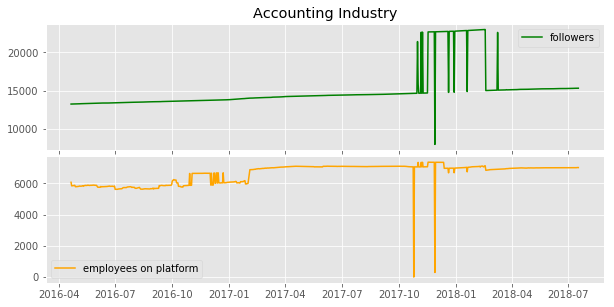

In [55]:
style.use('ggplot')
figsize=(10, 8)
fig = plt.figure(figsize = figsize)
plt.subplots_adjust(hspace=0.05)

ax1 = plt.subplot(311)
ax1.plot(df_accounting['as_of_date'], df_accounting['followers_count'], color='g', label='followers')
plt.legend()
plt.title('Accounting Industry')

ax2 = plt.subplot(312, sharex=ax1)
ax2.plot(df_accounting['as_of_date'], df_accounting['employees_on_platform'], color='orange', label='employees on platform')
plt.legend()

fig.autofmt_xdate()
xticklabels = ax2.get_xticklabels()
plt.setp(xticklabels, visible=True)
plt.show()

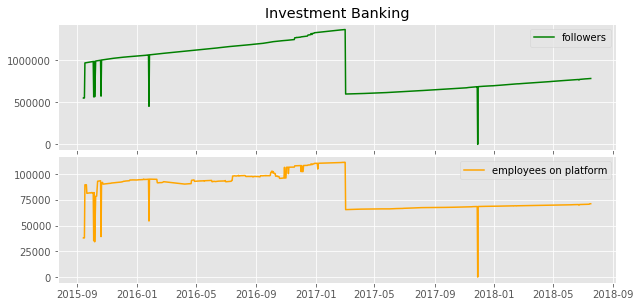

In [56]:
style.use('ggplot')
figsize=(10, 8)
fig = plt.figure(figsize = figsize)
plt.subplots_adjust(hspace=0.05)

ax1 = plt.subplot(311)
ax1.plot(df_invbanking['as_of_date'], df_invbanking['followers_count'], color='g', label='followers')
plt.legend()
plt.title('Investment Banking')

ax2 = plt.subplot(312, sharex=ax1)
ax2.plot(df_invbanking['as_of_date'], df_invbanking['employees_on_platform'], color='orange', label='employees on platform')
plt.legend()

fig.autofmt_xdate()
xticklabels = ax2.get_xticklabels()
plt.setp(xticklabels, visible=True)
plt.show()

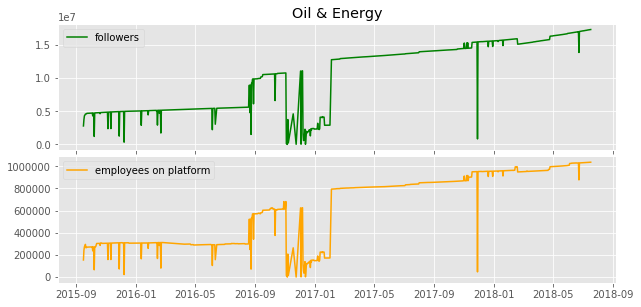

In [57]:
style.use('ggplot')
figsize=(10, 8)
fig = plt.figure(figsize = figsize)
plt.subplots_adjust(hspace=0.05)

ax1 = plt.subplot(311)
ax1.plot(df_oilenergy['as_of_date'], df_oilenergy['followers_count'], color='g', label='followers')
plt.legend()
plt.title('Oil & Energy')

ax2 = plt.subplot(312, sharex=ax1)
ax2.plot(df_oilenergy['as_of_date'], df_oilenergy['employees_on_platform'], color='orange', label='employees on platform')
plt.legend()

fig.autofmt_xdate()
xticklabels = ax2.get_xticklabels()
plt.setp(xticklabels, visible=True)
plt.show()

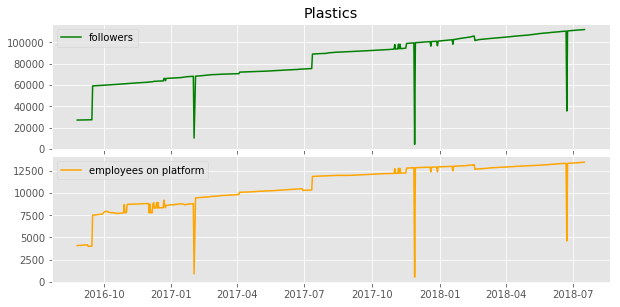

In [58]:
style.use('ggplot')
figsize=(10, 8)
fig = plt.figure(figsize = figsize)
plt.subplots_adjust(hspace=0.05)

ax1 = plt.subplot(311)
ax1.plot(df_plastics['as_of_date'], df_plastics['followers_count'], color='g', label='followers')
plt.legend()
plt.title('Plastics')

ax2 = plt.subplot(312, sharex=ax1)
ax2.plot(df_plastics['as_of_date'], df_plastics['employees_on_platform'], color='orange', label='employees on platform')
plt.legend()

fig.autofmt_xdate()
xticklabels = ax2.get_xticklabels()
plt.setp(xticklabels, visible=True)
plt.show()

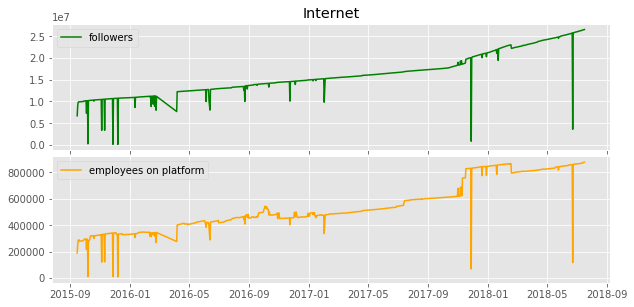

In [59]:
style.use('ggplot')
figsize=(10, 8)
fig = plt.figure(figsize = figsize)
plt.subplots_adjust(hspace=0.05)

ax1 = plt.subplot(311)
ax1.plot(df_internet['as_of_date'], df_internet['followers_count'], color='g', label='followers')
plt.legend()
plt.title('Internet')

ax2 = plt.subplot(312, sharex=ax1)
ax2.plot(df_internet['as_of_date'], df_internet['employees_on_platform'], color='orange', label='employees on platform')
plt.legend()

fig.autofmt_xdate()
xticklabels = ax2.get_xticklabels()
plt.setp(xticklabels, visible=True)
plt.show()